In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

In [2]:
import pandas as pd
import numpy as np

# Алгоритмы классификации

Имеются данные adult.csv (см. в материалах к занятию или на гитхабе).
Целевой переменной является уровень дохода income (крайний правый столбец).
Описание признаков можно найти по ссылке http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

Вам необходимо построить модель логистической регрессии, которая предсказывает уровень дохода человека. При возможности попробуйте улучшить точность предсказаний (метод score) с помощью перебора признаков.

Готовый ноутбук выложить на гитхаб и прислать ссылку.

In [3]:
# загружаем данные
src_df = pd.read_csv('./adult.csv')
src_df.head()
src_df.shape

(48842, 15)

In [4]:
src_df.info() # круто что нет пропушенных значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## 1. Делаем Feature Engineering

Добавляем некатегориальные переменные

In [5]:
src_df['workclass'].value_counts() # у нас в колонке 'workclass' есть странные значение == '?' дропаем их

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [6]:
src_df = src_df[src_df.workclass != '?']

In [7]:
# составляем список категориальных переменных
features_categorial = [column for (column, colimn_type) in zip(src_df, src_df.dtypes) if colimn_type is not np.dtype('int64')]
print('categotial:', features_categorial)

categotial: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [8]:
# формируем датасет
df = pd.get_dummies(src_df, columns=features_categorial)
df = df.iloc[:,:-1] # дропаем последнюю колонку (одна колона в предсказуемой переменной стала лишней)
df.head() 

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,34,198693,6,0,0,30,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


explained variance ratio: [0.9948353 0.00515  ] sum: 0.9999852980202092


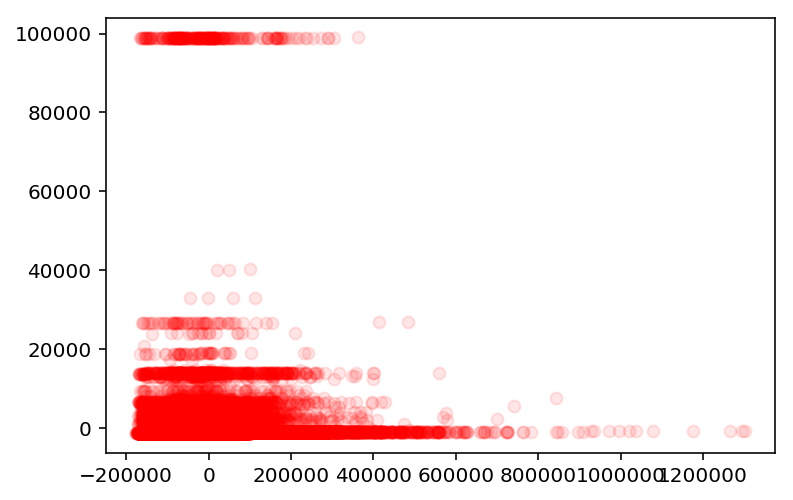

In [9]:
# Попробуем визуализировать переменные (для этого сократив размерность до 2х и посмотреть кластеры)
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(df.iloc[:,:-1])
data_pca = pca.transform(df.iloc[:,:-1])
expl_ratio = pca.explained_variance_ratio_
print('explained variance ratio:', expl_ratio, "sum:", expl_ratio.sum()) # отображаем explained_variance_ratio
_ = plt.plot(data_pca[:, 0], data_pca[:, 1], 'ro', alpha=0.1)

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape)
print(y.shape)

(46043, 107)
(46043,)


## 2. Строим модель

разделяем на обучающую и тестовую выборку

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=107).fit(X_train, y_train)
y_pred = model.predict(X_test)

проверяем точность модели

In [13]:
from sklearn.metrics import accuracy_score
print('accuracy',accuracy_score(y_test, y_pred))

accuracy 0.8522097947659898
